In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/US_Accidents_Dec21_updated.csv")

In [3]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [3]:
data = data.drop(columns = ['Number','Zipcode','Airport_Code','Country','Wind_Chill(F)', 'Wind_Direction', 
                    'Amenity','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])
data['Start_Time']=pd.to_datetime(data['Start_Time'])
data['End_Time']=pd.to_datetime(data['End_Time'])
data.insert(4,"time diff",(data['End_Time']-data["Start_Time"]).dt.total_seconds())
data.insert(3,"Year",pd.DatetimeIndex(data["Start_Time"]).year)
data.insert(4,"Month",pd.DatetimeIndex(data["Start_Time"]).month)
data.insert(5,"Day",pd.DatetimeIndex(data["Start_Time"]).day)

In [4]:
data.loc[:,"Bump":"Turning_Loop"]=data.loc[:,"Bump":"Turning_Loop"].astype(int)
#create dummies for sunrise_sunset
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].map({'Night':int(0), 'Day':int(1)})
df = data.dropna()
df

,ID,Severity,Start_Time,Year,Month,Day,End_Time,time diff,Start_Lat,Start_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016,2,8,2016-02-08 06:37:08,21600.0,40.108910,-83.092860,...,0,0,0,0,0,0,0,0,0,0.0
4,A-5,3,2016-02-08 07:53:43,2016,2,8,2016-02-08 13:53:43,21600.0,39.172393,-84.492792,...,0,0,0,0,0,0,0,0,0,1.0
7,A-8,2,2016-02-08 11:51:46,2016,2,8,2016-02-08 17:51:46,21600.0,41.375310,-81.820170,...,1,0,0,0,0,0,0,0,0,1.0
9,A-10,2,2016-02-08 15:16:43,2016,2,8,2016-02-08 21:16:43,21600.0,40.109310,-82.968490,...,0,0,0,0,0,0,0,0,0,1.0
10,A-11,2,2016-02-08 15:43:50,2016,2,8,2016-02-08 21:43:50,21600.0,39.192880,-84.477230,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019,8,23,2019-08-23 18:32:01,1716.0,34.002480,-117.379360,...,0,0,0,0,0,0,0,0,0,1.0
2845338,A-2845339,2,2019-08-23 19:11:30,2019,8,23,2019-08-23 19:38:23,1613.0,32.766960,-117.148060,...,0,0,0,0,0,0,0,0,0,1.0
2845339,A-2845340,2,2019-08-23 19:00:21,2019,8,23,2019-08-23 19:28:49,1708.0,33.775450,-117.847790,...,1,0,0,0,0,0,0,0,0,1.0
2845340,A-2845341,2,2019-08-23 19:00:21,2019,8,23,2019-08-23 19:29:42,1761.0,33.992460,-118.403020,...,0,0,0,0,0,0,0,0,0,1.0


In [ ]:
unique_weather = data["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

In [111]:
df_cleaned = df.drop(columns = ['ID','Start_Time', 'Year','Month','Day','Distance(mi)',
                            'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','Description',
                           'Street','Side','City','County','State','Timezone','time diff', 'Weather_Timestamp',
                            'Weather_Condition','Turning_Loop','Traffic_Calming'])
df_cleaned.columns

Index(['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')

**Balance Data**

In [ ]:
# Number of accidents of Severity 1,2,3,4
severity_1 = df_cleaned[df_cleaned['Severity'] == 1]
severity_2 = df_cleaned[df_cleaned['Severity'] == 2]
severity_3 = df_cleaned[df_cleaned['Severity'] == 3]
severity_4 = df_cleaned[df_cleaned['Severity'] == 4]
print(len(severity_1),len(severity_2),len(severity_3),len(severity_4))
severity_1_sample = severity_1
severity_2_sample = severity_2.sample(n=23556,replace=False,random_state = 2)
severity_3_sample = severity_3.sample(n=23556,replace=False,random_state = 2)
severity_4_sample = severity_4.sample(n=23556,replace=False,random_state = 2)
data_sample_1 = pd.concat([severity_1_sample,severity_2_sample,severity_3_sample,severity_4_sample])

## Feature Selection

In [ ]:
!pip install mlxtend

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [17]:
def forward_feature_selection(model,df,k):
    X = df.drop(['Severity'],axis = 1)
    y = df['Severity']
    sfs1 = sfs(model, k_features=k, forward=True, verbose=2, scoring='neg_mean_squared_error')
    sfs1 = sfs1.fit(X, y)
    feat_names = list(sfs1.k_feature_names_)
    return feat_names

def backward_feature_selection(model,df,k):
    X = df.drop(['Severity'],axis = 1)
    y = df['Severity']
    sfs1 = sfs(model, k_features=k, forward=False, verbose=2, scoring='neg_mean_squared_error')
    sfs1 = sfs1.fit(X, y)
    feat_names = list(sfs1.k_feature_names_)
    return feat_names

### Multicollinearity

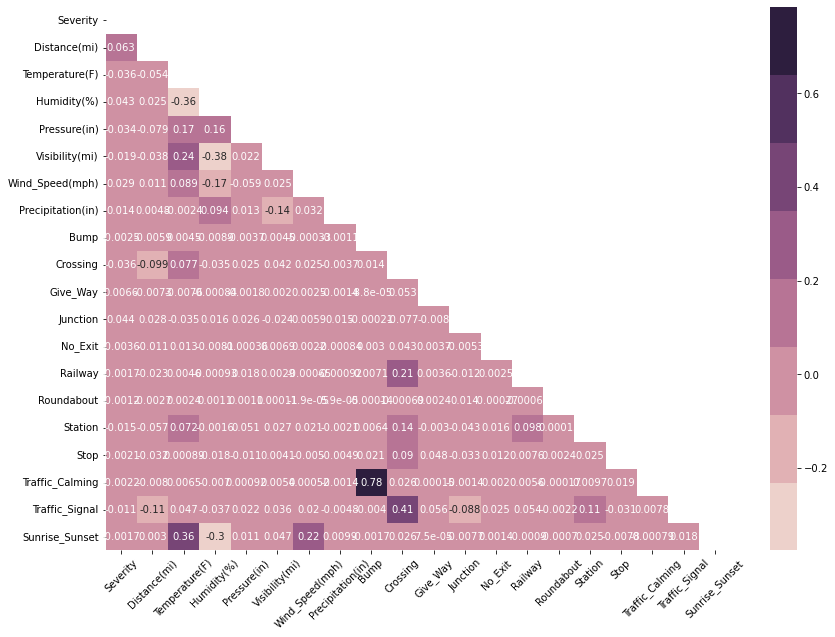

In [145]:
import seaborn as sns
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_cleaned.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df_cleaned.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

In [138]:
#from pandas_profiling import ProfileReport
#df_cleaned.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [139]:
#!pip install pandas_profiling

**Factor Analysis**

In [137]:
#!pip install factor_analyzer

In [10]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler

In [65]:
#df_cleaned[:,1:7]
FA_df

array(['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset'], dtype=object)

In [114]:
df_cleaned2 = data_sample_1.drop(columns = ['Severity'])
df_cleaned2

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Sunrise_Sunset
1735388,103.0,22.0,27.15,10.0,10.0,0.00,0,1,1,0,0,0,0,0,1,1,1.0
1736991,95.0,19.0,27.16,10.0,10.0,0.00,0,1,0,0,0,0,0,0,0,1,1.0
1749719,68.0,93.0,29.14,9.0,5.0,0.02,0,0,0,0,0,0,0,0,0,0,1.0
1751859,98.0,18.0,28.28,10.0,5.0,0.00,0,1,0,0,0,0,0,0,0,1,1.0
1753408,95.0,22.0,29.90,10.0,9.0,0.00,0,0,0,1,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317232,39.0,67.0,29.60,10.0,8.0,0.00,0,0,0,0,0,0,0,0,0,0,0.0
2554408,34.0,100.0,30.12,3.0,23.0,0.18,0,0,0,0,0,0,0,0,0,0,0.0
876516,59.0,30.0,29.79,10.0,6.0,0.00,0,0,0,0,0,0,0,0,0,0,1.0
2278179,41.0,93.0,29.77,1.0,25.0,0.01,0,0,0,0,0,0,0,1,0,1,1.0


In [115]:
#scale data
df_s = df_cleaned2[['Temperature(F)','Humidity(%)','Pressure(in)',    
                    'Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]
df_s

df_left = df_cleaned2[['Bump', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Signal', 'Sunrise_Sunset']]

scaler =  StandardScaler()
df_scaled = scaler.fit_transform(df_s)
df_scaled = pd.DataFrame(data=df_scaled,columns=df_s.columns)
df_scaled.head(10)

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2.140944,-1.630900,-1.554771,0.318442,0.360773,-0.096446
1,1.706937,-1.751113,-1.547206,0.318442,0.360773,-0.096446
2,0.242163,1.214119,-0.049159,-0.025444,-0.540229,0.115340
3,1.869690,-1.791183,-0.699825,0.318442,-0.540229,-0.096446
4,1.706937,-1.630900,0.525849,0.318442,0.180572,-0.096446
5,0.947424,0.653129,-0.003763,0.318442,-0.179828,0.009447
6,0.404915,0.733271,-1.055423,0.318442,-1.441230,-0.096446
7,-0.897106,0.212352,0.556113,0.318442,-0.900629,-0.096446
8,2.086693,-1.831254,-0.382058,0.318442,-0.900629,-0.096446
9,0.730421,-0.589062,0.540981,0.318442,-1.441230,-0.096446


In [116]:
df_left = df_left.reset_index(drop = True)
df_left

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Sunrise_Sunset
0,0,1,1,0,0,0,0,0,1,1,1.0
1,0,1,0,0,0,0,0,0,0,1,1.0
2,0,0,0,0,0,0,0,0,0,0,1.0
3,0,1,0,0,0,0,0,0,0,1,1.0
4,0,0,0,1,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
94219,0,0,0,0,0,0,0,0,0,0,0.0
94220,0,0,0,0,0,0,0,0,0,0,0.0
94221,0,0,0,0,0,0,0,0,0,0,1.0
94222,0,0,0,0,0,0,0,1,0,1,1.0


In [117]:
df_stand = pd.concat((df_left, df_scaled),axis = 1)
df_stand

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Sunrise_Sunset,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0,1,1,0,0,0,0,0,1,1,1.0,2.140944,-1.630900,-1.554771,0.318442,0.360773,-0.096446
1,0,1,0,0,0,0,0,0,0,1,1.0,1.706937,-1.751113,-1.547206,0.318442,0.360773,-0.096446
2,0,0,0,0,0,0,0,0,0,0,1.0,0.242163,1.214119,-0.049159,-0.025444,-0.540229,0.115340
3,0,1,0,0,0,0,0,0,0,1,1.0,1.869690,-1.791183,-0.699825,0.318442,-0.540229,-0.096446
4,0,0,0,1,0,0,0,0,0,0,1.0,1.706937,-1.630900,0.525849,0.318442,0.180572,-0.096446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94219,0,0,0,0,0,0,0,0,0,0,0.0,-1.331114,0.172281,0.298872,0.318442,0.000372,-0.096446
94220,0,0,0,0,0,0,0,0,0,0,0.0,-1.602368,1.494614,0.692299,-2.088760,2.703377,1.809633
94221,0,0,0,0,0,0,0,0,0,0,1.0,-0.246095,-1.310335,0.442624,0.318442,-0.360028,-0.096446
94222,0,0,0,0,0,0,0,1,0,1,1.0,-1.222612,1.214119,0.427493,-2.776533,3.063778,0.009447


In [118]:
chi_square_value,p_value = calculate_bartlett_sphericity(df_stand)
chi_square_value, p_value

(141055.17013382408, 0.0)

In [119]:
kmo_all,kmo_model = calculate_kmo(df_cleaned2)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.633311610101078


/Users/jessicawang/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [120]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df_stand.shape[1])

In [121]:
fa.fit(df_stand)

FactorAnalyzer(impute='drop', n_factors=17, rotation=None, rotation_kwargs={})

In [122]:
ev,_ = fa.get_eigenvalues()

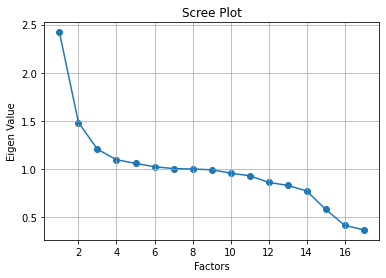

In [123]:
plt.scatter(range(1,df_stand.shape[1]+1),ev)
plt.plot(range(1,df_stand.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [124]:
print(pd.DataFrame(data = ev,columns = ['Original_Eigenvalues']))

    Original_Eigenvalues
0               2.420128
1               1.482958
2               1.205261
3               1.096314
4               1.058524
5               1.024180
6               1.004632
7               1.000047
8               0.992349
9               0.957192
10              0.930424
11              0.861595
12              0.830342
13              0.772062
14              0.580413
15              0.415610
16              0.367969


In [131]:
#the optimal number of the factor is 6
fa = FactorAnalyzer(n_factors=6,rotation='varimax')

fa.fit(df_cleaned2)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [135]:
#factor loading
loadings = pd.DataFrame(fa.loadings_,index=df_stand.columns)
loadings

,0,1,2,3,4,5
Bump,0.122164,-0.004053,-0.214844,0.883824,0.210456,0.016338
Crossing,-0.235434,-0.013849,0.733552,-0.191001,-0.414703,-0.010537
Give_Way,-0.114871,-0.004867,0.305320,0.190707,-0.127005,0.052322
Junction,0.053096,-0.001183,-0.482658,0.176826,-0.017491,0.006262
No_Exit,0.005213,0.001338,0.017446,-0.026123,0.433294,0.008940
Railway,-0.016486,-0.003757,0.195086,0.003966,0.071711,-0.001221
Roundabout,-0.009243,0.001034,-0.005905,0.004500,-0.002694,0.004153
Station,0.691157,0.014002,-0.094780,0.069247,0.059624,0.273356
Stop,0.059565,0.061009,0.003373,0.000894,0.007477,-0.007472
Traffic_Signal,-0.199401,-0.033554,0.054362,0.001502,0.013279,-0.015885


In [133]:
#variance
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          1.334363  1.001081  0.966075  0.955389  0.643085  0.513999
Proportional Var  0.078492  0.058887  0.056828  0.056199  0.037829  0.030235
Cumulative Var    0.078492  0.137379  0.194207  0.250406  0.288235  0.318470


In [136]:
c = pd.DataFrame(fa.get_communalities(),index=df_stand.columns,columns=['Communalities'])
c

,Communalities
Bump,0.886803
Crossing,0.802291
Give_Way,0.161676
Junction,0.267392
No_Exit,0.188839
Railway,0.043504
Roundabout,0.000166
Station,0.569951
Stop,0.007394
Traffic_Signal,0.044273
